                                           TP2 DATA CLEANING

**Write your names in the cell below**

In [75]:
ZGAREN

NameError: name 'ZGAREN' is not defined

In [ ]:
MOHAMED AMINE

**Write names of the 4 variables assigned to your group** (based on file variable_assignments.txt)

****

## Overview of the Data

The BRFSS (Behavioral Risk Factor Surveillance System) data was collected during the period 2013-2014 via monthly telephone-based surveys of randomly selected persons in the US. The rows in this data represent unique persons and the columns represent various demographic, life style, behavioral and health-related information about the interviewed persons.  Data website: https://www.cdc.gov/brfss/annual_data/annual_2013.html

All variables in this dataset are coded (represented) with numeric values, but many of them are truly categorical.

****

<font color='red'> **Files you will need ** </font> 

- File `brfss2013_sub.csv` : contains the data.
- File `data_codebook.html` : contains information about the data variables.
- File `variable_assignments.txt` : contains names of variables assigned to each group.
- File `TP2_Data_Cleaning.ipynb` : contains source code.

<font color='red'> **What you will do** </font> 

- Follow the instructions below and answer the questions.

- Your answers will generally consist of a mix of code and explanations.

- Feel free to create new cells to write your answers.

- Submit your modified .ipynb file containing your answers to the questions below.

******

## Useful functions and methods


**Data exploration**

- head, shape, columns, describe, value_counts, unique, nunique, plot

**Data type conversions**

- `pd.to_numeric` (Pandas function)
- `astype` (Pandas method)

**Dealing with missing values**
- `isna` (Pandas method)
- `fillna` (Pandas method)
- `dropna` (Pandas method)

*****

- to execute a cell, <font color='red'>shift+enter</font>
- to insert a new cell, press the <font color='red'>**+** button</font> in the top menu
- to obtain <font color='red'>help</font> about any method or function use ?

?pd.read_csv

?df.idate.isnull

## Part 1: Read the Data

Answer the following questions.  You need to write python code for some questions.

1. Read the data in file `brfss2013_sub.csv` and store it in a data frame called `df`
2. How many rows and columns are in this data frame?
3. What are the names and true types of the first 5 columns?
4. Are any of these first 5 columns useful for ML? Explain.

******

In [76]:
#Q1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv ('brfss2013_SUB.csv')

In [77]:
#Q2
df.shape

(100000, 91)

In [78]:
#Q3 
df.iloc[0:0, [0,1,2,3,4]].dtypes


idate       int64
imonth      int64
iday        int64
iyear       int64
dispcode    int64
dtype: object

In [1]:
#Q4
import pandas as pd
a5colonne = df.iloc[:, :5]
print(a5colonne)
a5colonne.info()

NameError: name 'df' is not defined

## Part 2: Data Exploration and Cleaning

Answer the questions below.

1. Create a list called `my_vars_names` containing the names of the 4 variables that were assigned to your group.

2. Create a new data frame called `my_df` as a subset of `df` containing only the columns in `my_vars_names`.

3. Verify the shape of this new data frame; Make sure its number of rows is the same as in `df`.

4. Determine the **true** type of each variable based on its description in file `data_codebook.html`; is it *categorical*, *discrete*, *continuous*, or **other** ?

5. For each truly *categorical* variable, convert it to the *category* type by calling the `astype` method ...

6. For each numeric variable, determine the unit(s) of measurement of its values based on the description in file `data_codebook.html`. For example: number of times per week; kilograms, etc.  **Be careful**: some variables contain values with different measurement units. For example, the **weight2** variable contains both values in *pounds* and values in *kilograms*! ...

7. For each numeric variable, determine whether it contains any invalid values; that is, values that are inconsistent with the variable's description in file `data_codebook.html`. **Hint**: the `describe` and `unique` methods are helpful ...

8. For each numeric variable, determine whether it contains outliers. **Hint1**: start by visualizing the distribution of the variable using a boxplot or histogram.  **Hint2**: if your variable has multiple units of measurement, use different plots for different units ...

9. For each categorical variable, how many categories does it have? **Hint**: call the `nunique` and/or `value_counts` methods ...

10. For each variable, if it contains **implicitly** encoded missing values, then replace those values with the explicit NAN value `np.nan`

11. How many missing values does each variable contain? **Hint**: call the `isnull` method followed by the `sum` method ...

12. Which variables should be removed because they contain too many missing values (more than 30%)?  **Hint**: call `isnull` followed by `mean` in order to obtain the fraction of missing values for each variable.

13. Remove all variables from `my_df` that contain more than 30% missing values. Put the result in a new data frame called `my_df_without_noisy_variables`. Display the shape of this data frame.

14. Remove all rows from `my_df` that contain missing values by calling the `dropna` method. Put the result in a new data frame called `my_df_without_missing`.  Display the shape of this new data frame.  **Hint**: carefully read the documentation of the `dropna` method using the command `?my_df.dropna`.

15. Based on the result of the previous question, do you think it's a good idea to handle missing values by removing the entire row? Explain.

16. For each numeric variable that has less than 30% missing values, replace its missing values with its *median* value, and put the result in the SAME data frame `my_df`. You should call the `fillna` method SEPARATELY on each variable, with the parameter `inplace=True`.

17. For each categorical variable that has less than 30% missing values, replace its missing values with the *most frequent* value and put the result in the SAME data frame `my_df`, by calling the `fillna` method SEPARATELY on each variable, with `inplace=True`.

In [80]:
#Q1
my_vars_names = ['numwomen','sex','maxdrnks','vegetab1']


In [81]:
#Q2
my_df = df[my_vars_names]

In [82]:
#Q3
my_df.shape

(100000, 4)

In [83]:
my_df.dtypes

numwomen    float64
sex           int64
maxdrnks    float64
vegetab1    float64
dtype: object

In [84]:
#Q4
numwomen :continuous
sex : categorical
maxdrnks : continuous
vegetab1 : continuous

NameError: name 'continuous' is not defined

In [85]:
#Q5
my_df = my_df.astype('category')
my_df.dtypes

numwomen    category
sex         category
maxdrnks    category
vegetab1    category
dtype: object

In [86]:
#Q6 
vegetab1: How Many Times Did You Eat vegetab1? => Unit of measurement: times per day (1), week (2), or month (3)

SyntaxError: invalid syntax (<ipython-input-86-f1b5e141eaf7>, line 2)

In [87]:
#Q7 
print("\nNumber of unique elements in 'numwomen': ", my_df.numwomen.nunique())
print("\nNumber of unique elements in 'sex': ", my_df.sex.nunique())
print("\nNumber of unique elements in 'maxdrnks': ", my_df.maxdrnks.nunique())
print("\nNumber of unique elements in 'vegetab1': ", my_df.vegetab1.nunique())


Number of unique elements in 'numwomen':  9

Number of unique elements in 'sex':  2

Number of unique elements in 'maxdrnks':  42

Number of unique elements in 'vegetab1':  102


In [88]:
my_df.describe()

,numwomen,sex,maxdrnks,vegetab1
count,72997.0,100000,47763.0,94100.0
unique,9.0,2,42.0,102.0
top,1.0,2,2.0,101.0
freq,57153.0,59020,12914.0,21949.0


(array([30991., 28214., 31136.,    72.,     0.,  1712.,     0.,  1334.,
            0.,   641.]),
 array([101. , 190.8, 280.6, 370.4, 460.2, 550. , 639.8, 729.6, 819.4,
        909.2, 999. ]),
 <BarContainer object of 10 artists>)

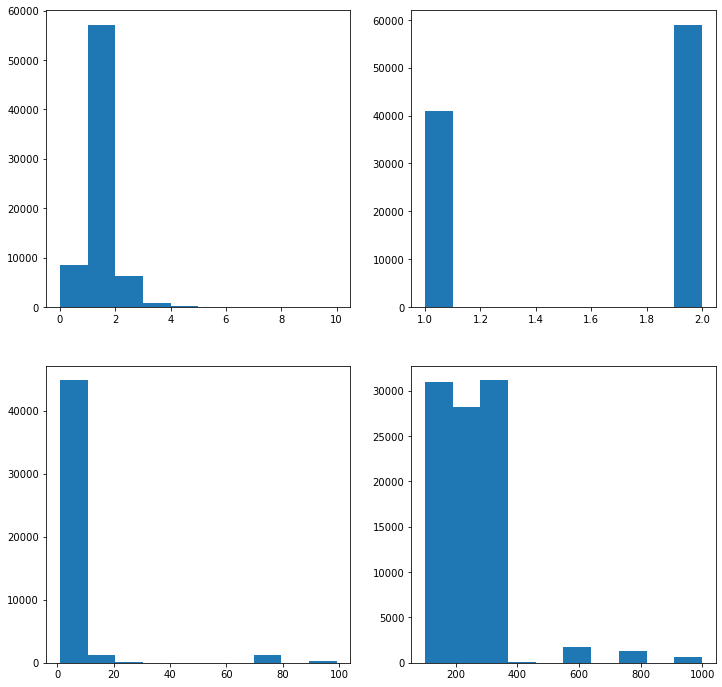

In [89]:
#Q8
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
plt.hist(my_df.numwomen)
#my_df['numwomen'].value_counts().plot(kind='bar')
plt.subplot(2, 2, 2)
plt.hist(my_df.sex)
#my_df['sex'].value_counts().plot(kind='bar')
plt.subplot(2, 2, 3)
plt.hist(my_df.maxdrnks)
#my_df['maxdrnks'].value_counts().plot(kind='bar')
plt.subplot(2, 2, 4)
plt.hist(my_df.vegetab1)
#my_df['vegetab1'].value_counts().plot(kind='bar')


#Needs normalization in order to obtain a good graphs

<AxesSubplot:>

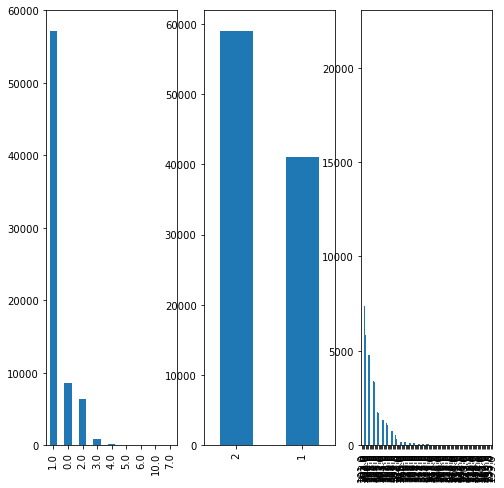

In [90]:
#Q9
plt.figure(figsize=(8, 8))
plt.subplot(1, 3, 1)
my_df['numwomen'].value_counts().plot(kind='bar')
plt.subplot(1, 3, 2)
my_df['sex'].value_counts().plot(kind='bar')
plt.subplot(1, 3, 3)
my_df['maxdrnks'].value_counts().plot(kind='bar')
my_df['vegetab1'].value_counts().plot(kind='bar')

In [102]:
#Q10
my_df.numwomen = my_df.numwomen.fillna(np.nan) 
my_df.sex = my_df.sex.fillna(np.nan)
my_df.maxdrnks = my_df.maxdrnks.fillna(np.nan)
my_df.vegetab1 = my_df.vegetab1.fillna(np.nan)
print("\nLet's check if the count of nan elements in each column..\n",my_df.isna().sum())


Let's check if the count of nan elements in each column..
 numwomen    27003
sex             0
maxdrnks    52237
vegetab1     5900
dtype: int64


In [92]:
#Q11
import matplotlib.pyplot as plt
import numpy as np
print("\nNumber of null elements in 'numwomen': ", my_df.numwomen.isnull().sum())
print("\nNumber of null elements in 'sex': ", my_df.sex.isnull().sum())
print("\nNumber of null elements in 'maxdrnks': ", my_df.maxdrnks.isnull().sum())
print("\nNumber of null elements in 'vegetab1': ", my_df.vegetab1.isnull().sum())


Number of null elements in 'numwomen':  27003

Number of null elements in 'sex':  0

Number of null elements in 'maxdrnks':  52237

Number of null elements in 'vegetab1':  5900


In [93]:
#Q12
print("\nMean of null elements in 'numwomen': ", my_df.numwomen.isnull().mean())
print("\nMean of null elements in 'sex': ", my_df.sex.isnull().mean())
print("\nMean of null elements in 'maxdrnks': ", my_df.maxdrnks.isnull().mean())
print("\nMean of null elements in 'vegetab1': ", my_df.vegetab1.isnull().mean())


Mean of null elements in 'numwomen':  0.27003

Mean of null elements in 'sex':  0.0

Mean of null elements in 'maxdrnks':  0.52237

Mean of null elements in 'vegetab1':  0.059


In [111]:
#Q13
lim =  my_df.isnull().mean()
print(lim)
Droped_Columns = lim[lim > 0.3].index
my_df = my_df.dropna(thresh=lim,axis=1)
my_df_without_noisy_variables = my_df.drop(columns=Droped_Columns)
my_df_without_noisy_variables.info()

numwomen    0.27003
sex         0.00000
maxdrnks    0.52237
vegetab1    0.05900
dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   numwomen  72997 non-null   category
 1   sex       100000 non-null  category
 2   vegetab1  94100 non-null   category
dtypes: category(3)
memory usage: 299.4 KB


In [107]:
#Q14
my_df_without_missing = my_df.dropna(axis=0, how='any')
print("my_df shape without removing rows that containt NA values: ", my_df.shape)
print("The new dataframe with rows that containt NA values removed: ", my_df_without_missing.shape)

my_df shape without removing rows that containt NA values:  (100000, 4)
The new dataframe with rows that containt NA values removed:  (32419, 4)


In [ ]:
We notice that the number of rows is now reduced by half which is not good for our data because we lost alot of useful information that the removed rows with N/A values still contain

In [112]:
my_df.dropna(axis='columns')

,sex
0,2
1,1
2,2
3,2
4,2
...,...
99995,1
99996,2
99997,1
99998,1


In [113]:
#Q16
df.fillna(df.select_dtypes(include='number').mean().iloc[0], inplace=True)
print (df)

          idate  imonth  iday  iyear  dispcode       seqno        ladult  \
0       4302013       4    30   2013      1100  2013009711  6.653541e+06   
1       4242013       4    24   2013      1100  2013003472  6.653541e+06   
2      10232013      10    23   2013      1100  2013006428  6.653541e+06   
3       1192013       1    19   2013      1100  2013000091  6.653541e+06   
4      12052013      12     5   2013      1100  2013004518  6.653541e+06   
...         ...     ...   ...    ...       ...         ...           ...   
99995  10222013      10    22   2013      1100  2013013677  6.653541e+06   
99996  12112013      12    11   2013      1100  2013006289  6.653541e+06   
99997   1082013       1     8   2013      1100  2013004762  6.653541e+06   
99998   5132013       5    13   2013      1100  2013004441  6.653541e+06   
99999  11192013      11    19   2013      1100  2013010296  6.653541e+06   

           numadult        nummen      numwomen  ...  seatbelt  flushot6  \
0      1.00

In [114]:
#Q17 
my_df.fillna(my_df.select_dtypes(include='object').mode().iloc[0], inplace=True)
print(my_df)

      numwomen sex maxdrnks vegetab1
0          1.0   2      NaN    101.0
1          0.0   1      NaN    101.0
2          1.0   2      NaN    101.0
3          1.0   2      2.0    107.0
4          1.0   2      NaN    315.0
...        ...  ..      ...      ...
99995      NaN   1      NaN    101.0
99996      NaN   2      NaN    777.0
99997      2.0   1     77.0    204.0
99998      NaN   1      1.0    202.0
99999      NaN   1      1.0    202.0

[100000 rows x 4 columns]


*****